## Alunos: 
Guilherme Sousa Lopes ()

Gustavo Fernandez Vidal Vazquez  ()

Lucas Rodrigues Aragão (538390)


## Bibliotecas

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import load_img, img_to_array 

## Dataset escolhido

O [dataset](https://www.kaggle.com/datasets/anshtanwar/jellyfish-types) contém 900 imagens de águas-vivas pertencentes a seis categorias e espécies diferentes:

- Medusa da Lua (Moon jellyfish/Aurelia aurita): Água-viva comum com quatro gônadas em forma de ferradura visíveis através do topo de sua campânula translúcida. Alimenta-se coletando medusas, plâncton e moluscos com seus tentáculos.
- Água-viva-barril (Barrel jellyfish/Rhizostoma pulmo): Maior água-viva encontrada nas águas britânicas, com uma campânula que pode crescer até 90 cm de diâmetro. Alimenta-se de plâncton e pequenos peixes, capturando-os com seus tentáculos.
- Água-viva-azul (Blue jellyfish/Cyanea lamarckii): Água-viva grande que pode atingir até 30 cm de diâmetro. Alimenta-se de plâncton e pequenos peixes, capturando-os com seus tentáculos.
- Água-viva-bússola (Compas jellyfish/Chrysaora hysoscella): Nomeada devido às marcações marrons em sua campânula que se assemelham a uma rosa-dos-ventos. Alimenta-se de plâncton e pequenos peixes, capturando-os com seus tentáculos.
- Água-viva-juba-de-leão (Lion´s mane jellyfish/Cyanea capillata): Maior água-viva do mundo, com uma campânula que pode crescer até 2 metros de diâmetro e tentáculos que podem atingir até 30 metros de comprimento. Alimenta-se de plâncton e pequenos peixes, capturando-os com seus tentáculos.
- Água-viva-luminescente (Mauve Stinger/Pelagia noctiluca): Pequena água-viva com tentáculos longos e estruturas verrugosas em sua campânula cheias de células urticantes. Alimenta-se de outras pequenas águas-vivas e tunicados oceânicos.

### Pré processamento das imagens

Conversão das imagens do dataset para matrizes numpy

In [28]:
def converterImagens(dir, name):
    data = []
    labels = []
    classNames = sorted(os.listdir(dir))

    for classIndex, className in enumerate(classNames):
        classPath = os.path.join(dir, className)
        if os.path.isdir(classPath):
            for filename in os.listdir(classPath):
                imagePath = os.path.join(classPath, filename)
                image = load_img(imagePath, target_size = (224,224)) #224,224 eh o tamanho das imagens originais
                imageArray = img_to_array(image)/255.0 # divide por 255 p normalizar
                data.append(imageArray)
                labels.append(classIndex)

    data = np.array(data)
    labels = np.array(labels)

    np.save(f"data/{name}_images.npy", data)
    np.save(f"data/{name}_labels.npy", labels)

In [29]:
pathTrain = 'Train_Test_Valid/Train'
pathValid = 'Train_Test_Valid/valid'
pathTest = 'Train_Test_Valid/test'
converterImagens(pathTrain, "train")
converterImagens(pathValid, "valid")
converterImagens(pathTest, "test")

## Treinamento

In [56]:
from tensorflow.keras.utils import to_categorical

trainFeatures = np.load("data/train_images.npy")
trainLabels = np.load("data/train_labels.npy")

valFeatures = np.load("data/valid_images.npy")
valLabels = np.load("data/valid_labels.npy")

numClasses = len(np.unique(trainLabels))
trainLabels = to_categorical(trainLabels, numClasses)
valLabels = to_categorical(valLabels, numClasses)

trainFeatures = np.array(trainFeatures, dtype=np.float32)
valFeatures = np.array(valFeatures, dtype=np.float32)

In [58]:
print(trainFeatures.shape)

(900, 224, 224, 3)


### Modelagem da rede neural

In [59]:
numFilters = 16
filterSize = (3, 3)
poolSize = (2, 2)
inputShape = (224, 224, 3)

model = Sequential([
    Conv2D(numFilters, filterSize, activation="relu", input_shape=inputShape),
    MaxPooling2D(pool_size=poolSize),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(numClasses, activation="softmax")  
])

In [64]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy", Precision(), Recall()])

In [61]:
print("trainFeatures shape:", trainFeatures.shape)
print("trainLabels shape:", trainLabels.shape)
print("valFeatures shape:", valFeatures.shape)
print("valLabels shape:", valLabels.shape)

trainFeatures shape: (900, 224, 224, 3)
trainLabels shape: (900, 6)
valFeatures shape: (39, 224, 224, 3)
valLabels shape: (39, 6)


In [79]:
history = model.fit(trainFeatures, trainLabels, epochs=20, batch_size=32, validation_data=(valFeatures, valLabels))

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 0.9806 - loss: 0.1085 - precision_5: 0.9858 - recall_5: 0.9744 - val_accuracy: 0.5641 - val_loss: 2.0371 - val_precision_5: 0.5714 - val_recall_5: 0.5128
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step - accuracy: 0.9881 - loss: 0.0721 - precision_5: 0.9929 - recall_5: 0.9810 - val_accuracy: 0.4872 - val_loss: 2.0611 - val_precision_5: 0.4848 - val_recall_5: 0.4103
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - accuracy: 0.9977 - loss: 0.0503 - precision_5: 0.9977 - recall_5: 0.9959 - val_accuracy: 0.5385 - val_loss: 1.8045 - val_precision_5: 0.5882 - val_recall_5: 0.5128
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - accuracy: 1.0000 - loss: 0.0338 - precision_5: 1.0000 - recall_5: 1.0000 - val_accuracy: 0.5897 - val_loss: 1.9412 - val_precision_5: 0.6562 - val_recall_5: 0.5385
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.9982 - loss: 0.0295 - precision_5: 0.9982 - recall_5: 0.9968 -

## Resultados

In [80]:
# Exemplo de acesso às métricas
print(history.history.keys())  # Mostra as métricas disponíveis

# Acessando as métricas de treino
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
train_precision = history.history['precision_5']  # Se você adicionou Precision()
train_recall = history.history['recall_5']  # Se você adicionou Recall()

# Acessando as métricas de validação
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_precision = history.history['val_precision_5']  # Se você adicionou Precision()
val_recall = history.history['val_recall_5']  # Se você adicionou Recall()

dict_keys(['accuracy', 'loss', 'precision_5', 'recall_5', 'val_accuracy', 'val_loss', 'val_precision_5', 'val_recall_5'])


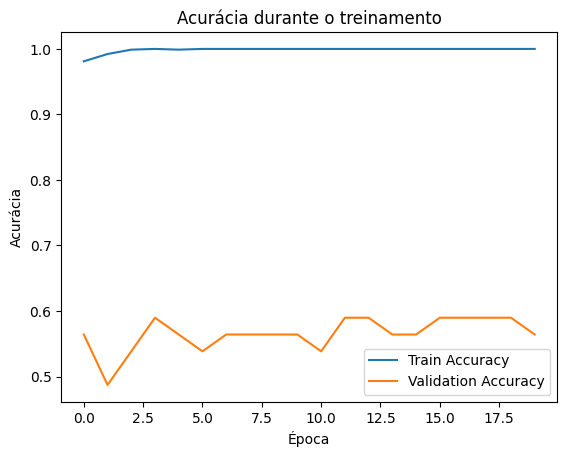

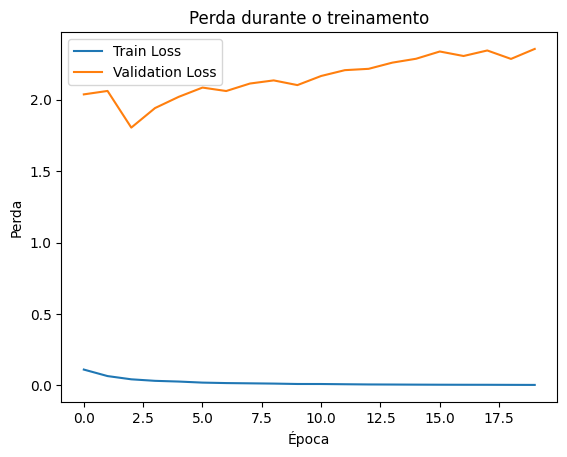

In [81]:
import matplotlib.pyplot as plt

# Plotar acurácia de treino e validação
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Plotar perda de treino e validação
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

## Treinamento

In [82]:
# Carregar dados de teste
testFeatures = np.load("data/test_images.npy")
testLabels = np.load("data/test_labels.npy")

# Codificar rótulos em one-hot (se necessário)
testLabels = to_categorical(testLabels, numClasses)

In [83]:
# Avaliar o modelo nos dados de teste
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(testFeatures, testLabels)

# Exibir os resultados
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.4667 - loss: 1.6486 - precision_5: 0.5368 - recall_5: 0.4667
Test Loss: 1.7041785717010498
Test Accuracy: 0.44999998807907104
Test Precision: 0.529411792755127
Test Recall: 0.44999998807907104


In [84]:
# Fazer previsões
predictions = model.predict(testFeatures)

# predictions será um array com as probabilidades para cada classe
# Para obter a classe predita, use np.argmax:
predicted_classes = np.argmax(predictions, axis=1)

# Se os rótulos de teste estiverem em one-hot, converta de volta para inteiros
true_classes = np.argmax(testLabels, axis=1)

# Exibir algumas previsões
for i in range(5):  # Exibe as 5 primeiras previsões
    print(f"Imagem {i}: Classe predita = {predicted_classes[i]}, Classe verdadeira = {true_classes[i]}") 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Imagem 0: Classe predita = 2, Classe verdadeira = 0
Imagem 1: Classe predita = 2, Classe verdadeira = 0
Imagem 2: Classe predita = 0, Classe verdadeira = 0
Imagem 3: Classe predita = 0, Classe verdadeira = 0
Imagem 4: Classe predita = 2, Classe verdadeira = 0
